In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

In [14]:
"""Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную  \
статистику.Вопрос: сколько в датасете пропущенных значений?"""

'Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную  статистику.Вопрос: сколько в датасете пропущенных значений?'

In [15]:
transaction_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tonojan/lesson_5/transaction_data.csv')

In [16]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [17]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [18]:
transaction_data.shape

(5315, 3)

In [20]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [19]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [21]:
"""Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? \
Визуализируйте результат с помощью барплота."""

'Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.'

In [22]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [23]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

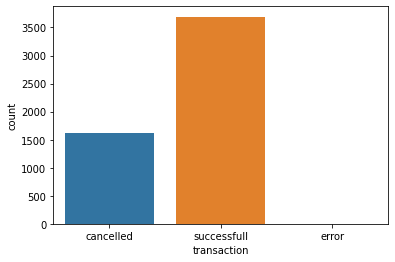

In [24]:
sns.countplot(data=transaction_data,x='transaction')

In [25]:
"""Сколько произошло ошибок? """

'Сколько произошло ошибок? '

In [27]:
transaction_data.transaction.value_counts()
#error   4

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [42]:
"""Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull          \
Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых \
каждым пользователем,  где по оси x – число транзакций, по оси y – доля пользователей с таким числом транзакций"""

'Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull          Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем,  где по оси x – число транзакций, по оси y – доля пользователей с таким числом транзакций'

In [62]:
success_name=transaction_data.query("transaction=='successfull'") \
    .groupby("name",as_index=False).agg({'date':'count'})  \
    .rename(columns={'date':'cnt'}).sort_values('cnt',ascending=False)
success_name.head(3)

,name,cnt
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80


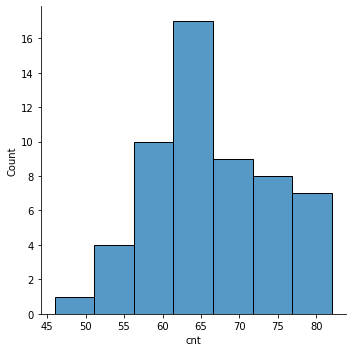

In [64]:
sns.displot(data=success_name, x='cnt')

In [65]:
success_name.describe()

,cnt
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [75]:
"""К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где: \
столбцы – имена пользователей, строки – минута времени осуществления операции (minute) \
значения – число совершённых операций. Пропущенные значения заполните нулями. \
Note: фильтровать успешные транзакции не нужно - постройте табличку по всем"""

'К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где: столбцы – имена пользователей, строки – минута времени осуществления операции (minute) значения – число совершённых операций. Пропущенные значения заполните нулями. Note: фильтровать успешные транзакции не нужно - постройте табличку по всем'

In [67]:
new_sales= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tonojan/lesson_5/transaction_data_updated.csv')

In [69]:
new_sales.head(3)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6


In [70]:
name_minute=new_sales.groupby(['name','minute'],as_index=False).size()
name_minute.head(3)

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1


In [73]:
user_vs_minute_pivot=name_minute.pivot(index='minute',columns='name',values='size').fillna(0)

In [74]:
user_vs_minute_pivot.head(3)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0


In [83]:
"""Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, \
и посмотрите, произошли ли изменения."""

'Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, и посмотрите, произошли ли изменения.'

In [91]:
new_sales['date']=pd.to_datetime(new_sales['date'])
new_sales['true_minute']=new_sales.date.dt.hour*60+new_sales.minute

In [92]:
new_sales.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


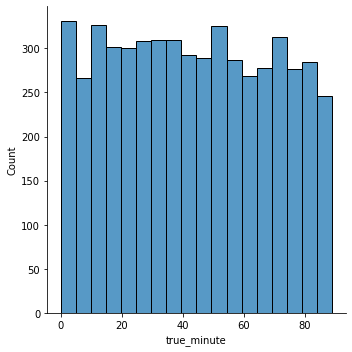

In [95]:
sns.displot(data=new_sales, x=new_sales.true_minute)